# 支持向量机SVM（Support Vector Machine）

## 【关键词】支持向量，最大几何间隔，拉格朗日乘子法

## 一、支持向量机的原理

Support Vector Machine。支持向量机，其含义是通过支持向量运算的分类器。其中“机”的意思是机器，可以理解为分类器。
那么什么是支持向量呢？在求解的过程中，会发现只根据部分数据就可以确定分类器，这些数据称为支持向量。
见下图，在一个二维环境中，其中点R，S，G点和其它靠近中间黑线的点可以看作为支持向量，它们可以决定分类器，也就是黑线的具体参数。

![1.png](attachment:1.png)

解决的问题：

- 线性分类

在训练数据中，每个数据都有n个的属性和一个二类类别标志，我们可以认为这些数据在一个n维空间里。我们的目标是找到一个n-1维的超平面（hyperplane），这个超平面可以将数据分成两部分，每部分数据都属于同一个类别。
其实这样的超平面有很多，我们要找到一个最佳的。因此，增加一个约束条件：这个超平面到每边最近数据点的距离是最大的。也成为最大间隔超平面（maximum-margin hyperplane）。这个分类器也成为最大间隔分类器（maximum-margin classifier）。
支持向量机是一个二类分类器。

- 非线性分类

SVM的一个优势是支持非线性分类。它结合使用拉格朗日乘子法和KKT条件，以及核函数可以产生非线性分类器。

SVM的目的是要找到一个线性分类的最佳超平面 f(x)=xw+b=0。求 w 和 b。

首先通过两个分类的最近点，找到f(x)的约束条件。

有了约束条件，就可以通过拉格朗日乘子法和KKT条件来求解，这时，问题变成了求拉格朗日乘子αi 和 b。

对于异常点的情况，加入松弛变量ξ来处理。

非线性分类的问题：映射到高维度、使用核函数。

#### 线性分类及其约束条件

SVM的解决问题的思路是找到离超平面的最近点，通过其约束条件求出最优解。

![3.png](attachment:3.png)

![4.PNG](attachment:4.PNG)

#### 最大几何间隔（geometrical margin）

![5.PNG](attachment:5.PNG)

#### 求解问题w,b

我们使用拉格朗日乘子法(http://blog.csdn.net/on2way/article/details/47729419)
来求w和b，一个重要原因是使用拉格朗日乘子法后,还可以解决非线性划分问题。
拉格朗日乘子法可以解决下面这个问题：

![6.PNG](attachment:6.PNG)

消除w之后变为：

![7.PNG](attachment:7.PNG)

可见使用拉格朗日乘子法后，求w,b的问题变成了求拉格朗日乘子αi和b的问题。
到后面更有趣，变成了不求w了，因为αi可以直接使用到分类器中去，并且可以使用αi支持非线性的情况.

## 二、实战

### 1、画出决策边界

导包sklearn.svm

In [1]:
import numpy as np

from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline

随机生成数据，并且进行训练np.r_[]

In [12]:
a = [[1,1],[2,2],[3,3]]
b = [[-1,0],[-2,2],[-3,1]]

#ravel() 平坦化，将二维的数据变成一维
np.r_[a,b]
# np.c_[a,b]

array([[ 1,  1],
       [ 2,  2],
       [ 3,  3],
       [-1,  0],
       [-2,  2],
       [-3,  1]])

In [7]:
X_train = np.array([np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]])
X_train = X_train.reshape((40,2))

In [83]:
X_train = np.r_[np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]]

In [17]:
X_train.shape

(40, 2)

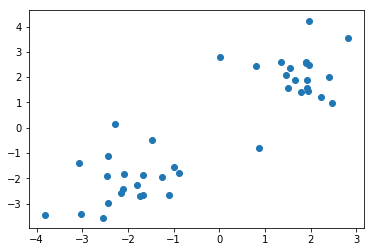

In [77]:
plt.scatter(X_train[:,0],X_train[:,1])

In [79]:
y_train = ['r']*20+['b']*20
y_train

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b']

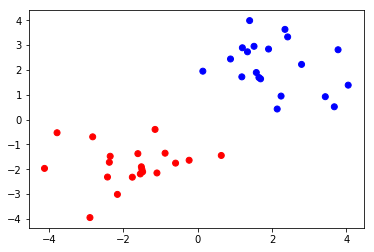

In [84]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

训练模型，并训练

In [87]:
svc = SVC(kernel='linear')

In [88]:
#X_train两类数据点，y_train两类数据点的标签
#
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

提取系数获取斜率

In [89]:
coef_ = svc.coef_
coef_

array([[-0.50516578, -0.66315088]])

In [90]:
# w = (y1 - y2)/(x1 - x2)

#斜率获取到了

w = -coef_[0,0]/ coef_[0,1]

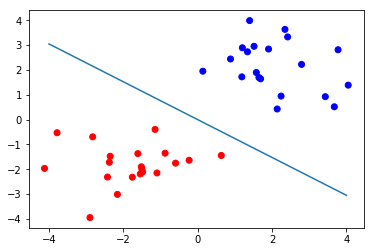

In [91]:
x = np.linspace(-4,4,100)

plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

plt.plot(x,w*x)

In [35]:
#求解截距
#bias  偏差
#机器学习，求解了函数之后，斜率确定了
#
#intercper_支持向量机求解出来的截距，标准
intercept_ = svc.intercept_

b = -intercept_[0]/coef_[0,1]

In [38]:
#X轴方向的系数
coef_[0,1]

-0.62420659626979602

In [37]:
coef_
# (y1 - y2)/(x1 - x2)

array([[-1.25933227, -0.6242066 ]])

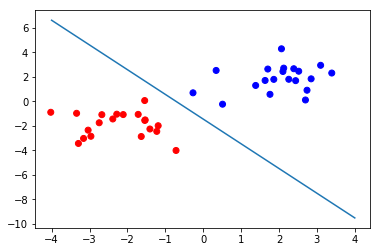

In [36]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

#y = w*x + b

plt.plot(x,w*x + b)

In [39]:
#获取支持向量
vectors_ = svc.support_vectors_
vectors_

array([[-0.26902411,  0.69545925],
       [-1.54394121,  0.0635278 ]])

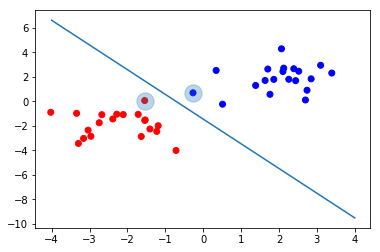

In [41]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

#y = w*x + b

plt.plot(x,w*x + b)

plt.scatter(vectors_[:,0],vectors_[:,1],s = 300,alpha=0.3)

上边界和下边界  
support_vectors_

In [42]:
#上边界和下边界的斜率是相同的

#y = w*x + b
#b = y - w*x

#求解上边界
upper = vectors_[0]

down = vectors_[-1]

upper_intercept = upper[1] - w*upper[0]
down_intercept = down[1] - w*down[0]

绘制图形

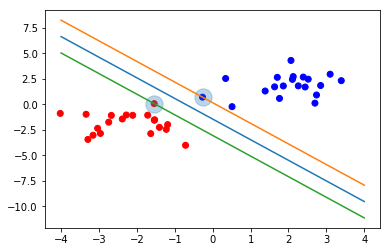

In [43]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

#y = w*x + b

plt.plot(x,w*x + b)

plt.scatter(vectors_[:,0],vectors_[:,1],s = 300,alpha=0.3)

#上边界的绘制
plt.plot(x,w*x + upper_intercept)

#下边界的绘制
plt.plot(x,w*x + down_intercept)

### 2、SVM分离坐标点

导包

In [45]:
from sklearn.svm import SVC
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

创造-3到3范围的点以及meshgrid

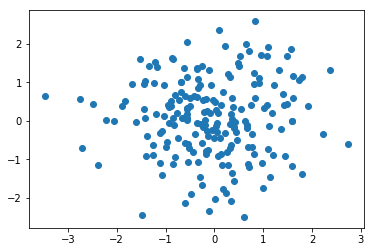

In [95]:
X_train = np.random.randn(200,2)

#创造目标值
plt.scatter(X_train[:,0],X_train[:,1])

In [57]:
a = [True,False,False,True]
b = [True,True,False,False]
np.logical_and(a,b)

array([ True, False, False, False], dtype=bool)

In [54]:
np.logical_or(a,b)

array([ True,  True], dtype=bool)

In [55]:
#not 非
np.logical_not(a)

array([False,  True], dtype=bool)

In [58]:
#xor 异或
np.logical_xor(a,b)

array([False,  True, False,  True], dtype=bool)

In [97]:
#np 逻辑运算符
y_train = np.logical_xor(X_train[:,0]>0,X_train[:,1]>0)

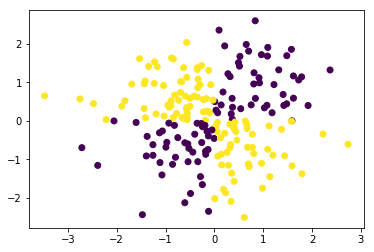

In [98]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

创造模型：rbf，训练数据

In [99]:
#radius base function :基于半径的方法
#类似KNN 
svc = SVC(kernel='rbf')

svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
#svc 算法，就可以知道一三象限的数据是一类，二四象限的数据另一组

In [66]:
#创造预测数据
xx,yy = np.meshgrid(np.linspace(-3,3,500),np.linspace(-3,3,500))

#xy 平面中所有点，
xy = np.c_[xx.ravel(),yy.ravel()]

In [68]:
xy.shape

(250000, 2)

绘制图形  
绘制测试点到分离超平面的距离(decision_function)  
绘制轮廓线  
绘制训练点

In [62]:
X_train.shape

(200, 2)

In [63]:
xy.shape

(500, 1000)

In [100]:
#测试点到分离超平面的距离
y_ = svc.decision_function(xy)

[-3, 3, -3, 3]

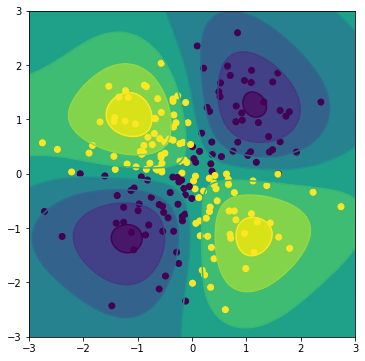

In [107]:
plt.figure(figsize=(6,6))
#将测试点到分离超平面的距离绘制成了一张图片

plt.imshow(y_.reshape(xx.shape),extent=[-3,3,-3,3],cmap=plt.cm.PuOr_r)


#绘制轮廓,等高线，此圆圈上的测试点，到分离超平面的距离是相同的
plt.contourf(xx,yy,y_.reshape(xx.shape))

plt.contour(xx,yy,y_.reshape(xx.shape))


plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

plt.axis([-3,3,-3,3])

### 3、使用多种核函数对iris数据集进行分类

导包

In [128]:
import sklearn.datasets as datasets

iris = datasets.load_iris()

X_train = iris.data
y_train = iris.target

提取数据只提取两个特征，方便画图  
创建支持向量机的模型：'linear', 'poly'(多项式), 'rbf'(Radial Basis Function:基于半径函数),

In [129]:
X_train = X_train[:,[2,3]]

In [110]:
X_train.shape

(150, 2)

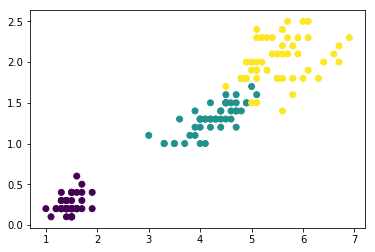

In [131]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

In [150]:
linear_svc = SVC(kernel='linear')
poly_svc = SVC(kernel='poly')
rbf_svc = SVC(kernel='rbf')
# The implementation is based on libsvm
sigmoid_svc = SVC(kernel='sigmoid')
'''It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
     a callable'''

# precomputed_svc = SVC(kernel='precomputed')

# Similar to SVC with parameter kernel='linear', 
# but implemented in terms of liblinear rather than libsvm
from sklearn.svm import LinearSVC
lsvc = LinearSVC()

训练模型

In [152]:
estimators = {'linear_svc':linear_svc,'poly_svc':poly_svc,
              'rbf_svc':rbf_svc,'sigmoid_svc':sigmoid_svc,
             'lsvc':lsvc}

In [137]:
for key,estismator in estimators.items():
    estismator.fit(X_train,y_train)

图片背景点

In [138]:
#数据预测，背景当中点，提取出来

xmin,xmax = X_train[:,0].min(),X_train[:,0].max()

ymin,ymax = X_train[:,1].min(),X_train[:,1].max()

xx,yy = np.meshgrid(np.linspace(xmin,xmax,700),np.linspace(ymin,ymax,300))

#交叉X轴和Y轴的点
xy = np.c_[xx.ravel(),yy.ravel()]

In [140]:
xx.shape

(300, 700)

In [139]:
xy.shape

(210000, 2)

预测并绘制图形for循环绘制图形

In [154]:
for i,key in enumerate(estimators):
    print(i,key)

0 sigmoid_svc
1 lsvc
2 poly_svc
3 linear_svc
4 rbf_svc


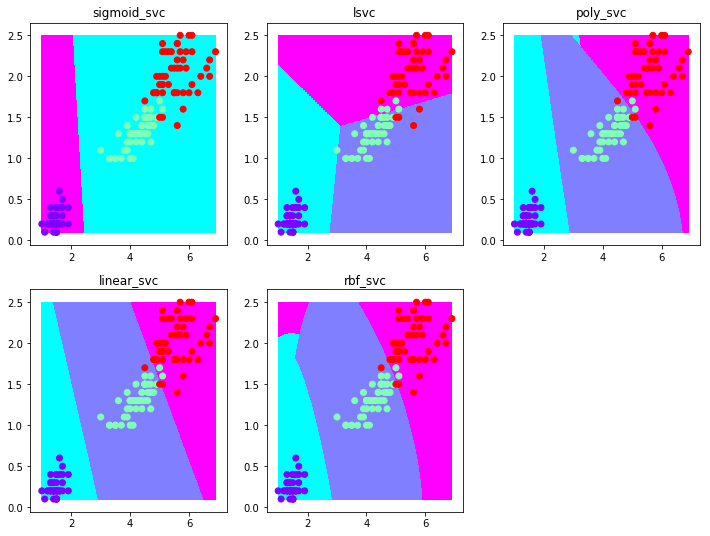

In [153]:
plt.figure(figsize=(12,9))

for i,key in enumerate(estimators):
    esitmator = estimators[key]
    
    #训练
    esitmator.fit(X_train,y_train)
    #预测数据之前，先进行训练
    
    #预测
    y_ = esitmator.predict(xy)
    
    axes = plt.subplot(2,3,i+1)
    
    axes.pcolormesh(xx,yy,y_.reshape((300,700)),cmap = 'cool')
    
    axes.scatter(X_train[:,0],X_train[:,1],c = y_train,cmap = 'rainbow')
    
    axes.set_title(key)

### 4、使用SVM多种核函数进行回归

导包

In [155]:
from sklearn.svm import SVR

自定义样本点rand，并且生成sin值

In [159]:
X_train = 8*np.random.rand(80,1)

In [160]:
y_train = np.sin(X_train)

In [162]:
y_train.shape

(80, 1)

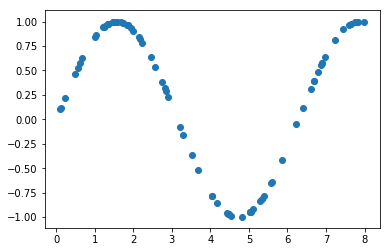

In [161]:
plt.scatter(X_train,y_train)

数据加噪

In [163]:
y_train[::5] += np.random.randn(16,1)*0.3

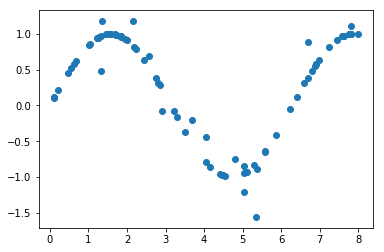

In [164]:
plt.scatter(X_train,y_train)

建立模型，训练数据，并预测数据，预测训练数据就行

In [168]:
esitimators = {'linear_svr':SVR(kernel='linear'),
              'poly_svr':SVR(kernel='poly'),
              'rbf_svr':SVR(kernel='rbf'),
              'sigmoid_svr':SVR(kernel='sigmoid')}

绘制图形，观察三种支持向量机内核不同

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


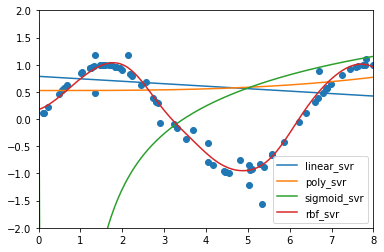

In [171]:
for i,key in enumerate(esitimators):
    
    esitmator = esitimators[key]
    
    #训练
    esitmator.fit(X_train,y_train)
    
    #预测
    x_test = np.linspace(0,8,200).reshape((200,1))
    
    y_ = esitmator.predict(x_test)
    
    plt.plot(x_test,y_,label = key)
    
    plt.legend()
    if i == 3:
        plt.scatter(X_train,y_train)
        plt.axis([0,8,-2,2])

## 三、作业

### 1、使用不同核对下面三个数据集进行分类，并画出分类边界

- ex6data1.mat
- ex6data2.mat
- ex6data3.mat


### 2、使用SVC对cars.txt进行分析

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

这是一个关于汽车测评的数据集，类别变量为汽车的测评，（unacc，ACC，good，vgood）分别代表（不可接受，可接受，好，非常好），而6个属性变量分别为「买入价」，「维护费」，「车门数」，「可容纳人数」，「后备箱大小」，「安全性」。值得一提的是6个属性变量全部是有序类别变量，比如「可容纳人数」值可为「2，4，more」，「安全性」值可为「low, med, high」

price、maint、doors、persons、lug_boot、safty、recommend

In [2]:
#使用pd读取数据
car = pd.read_csv('../data/cars.txt',header = None)
car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
#修改列名
car.columns = ['price','maint','doors','persons','lug_boot','safty','recommned']
car.head()

,price,maint,doors,persons,lug_boot,safty,recommned
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
a = np.array(['good'])
a.astype('int')
# a

ValueError: invalid literal for int() with base 10: 'good'

In [10]:
#map 映射，改变一列的数据
car['price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [11]:
car['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [12]:
price = {'vhigh':4,'high':3,'med':2,'low':1}

car['price'] = car['price'].map(price)
car['maint'] = car['maint'].map(price)
car.head()

,price,maint,doors,persons,lug_boot,safty,recommned
0,4,4,2,2,small,low,unacc
1,4,4,2,2,small,med,unacc
2,4,4,2,2,small,high,unacc
3,4,4,2,2,med,low,unacc
4,4,4,2,2,med,med,unacc


In [17]:
car['doors'].unique()

array([2, 3, 4, 5])

In [16]:
car['persons'].unique()

array([ 2,  4, 10])

In [15]:
#公用一个映射关系
d_p = {'2':2,'3':3,'4':4,'more':10,'5more':5}

car.doors = car.doors.map(d_p)
car.persons = car.persons.map(d_p)
car.head()

,price,maint,doors,persons,lug_boot,safty,recommned
0,4,4,2,2,small,low,unacc
1,4,4,2,2,small,med,unacc
2,4,4,2,2,small,high,unacc
3,4,4,2,2,med,low,unacc
4,4,4,2,2,med,med,unacc


In [18]:
car.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [19]:
car.safty.unique()

array(['low', 'med', 'high'], dtype=object)

In [20]:
lug_safty = {'small':1,'med':2,'big':3,'low':1,'high':3}

car.lug_boot = car.lug_boot.replace(lug_safty)
car.safty = car.safty.replace(lug_safty)
car.head()

,price,maint,doors,persons,lug_boot,safty,recommned
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


In [24]:
x_data = car[['price','maint','doors','persons','lug_boot','safty']]
y_target = car['recommned']

In [25]:
car.shape

(1728, 7)

In [27]:
X_train,x_test,y_train,y_test = train_test_split(x_data,y_target,test_size = 0.1)

In [29]:
type(X_train)

pandas.core.frame.DataFrame

In [30]:
#weight 权重
svc = SVC()

In [31]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
svc.predict(x_test[::10])

array(['acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc'], dtype=object)

In [33]:
y_test[::10]

944       acc
1091      acc
858     unacc
906     unacc
1346      acc
1323    unacc
588     unacc
1011    unacc
900     unacc
885     unacc
1050    unacc
449     unacc
600     unacc
1474      acc
1019      acc
456     unacc
1243    unacc
1056    unacc
Name: recommned, dtype: object

In [39]:
car_origal = pd.read_csv('../data/cars.txt',header = None)
car_origal.loc[index]

,0,1,2,3,4,5,6
944,med,vhigh,4,more,big,high,acc
1091,med,med,2,4,small,high,acc
858,high,low,5more,more,med,low,unacc
906,med,vhigh,3,4,big,low,unacc
1346,low,vhigh,3,more,med,high,acc
1323,low,vhigh,3,2,small,low,unacc
588,high,high,3,more,med,low,unacc
1011,med,high,3,4,med,low,unacc
900,med,vhigh,3,4,small,low,unacc
885,med,vhigh,2,more,med,low,unacc


In [36]:
index = x_test[::10].index
car.loc[index]

,price,maint,doors,persons,lug_boot,safty,recommned
944,2,4,4,10,3,3,acc
1091,2,2,2,4,1,3,acc
858,3,1,5,10,2,1,unacc
906,2,4,3,4,3,1,unacc
1346,1,4,3,10,2,3,acc
1323,1,4,3,2,1,1,unacc
588,3,3,3,10,2,1,unacc
1011,2,3,3,4,2,1,unacc
900,2,4,3,4,1,1,unacc
885,2,4,2,10,2,1,unacc
